In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
import math
from shapely.geometry import *

### About 2 Circle

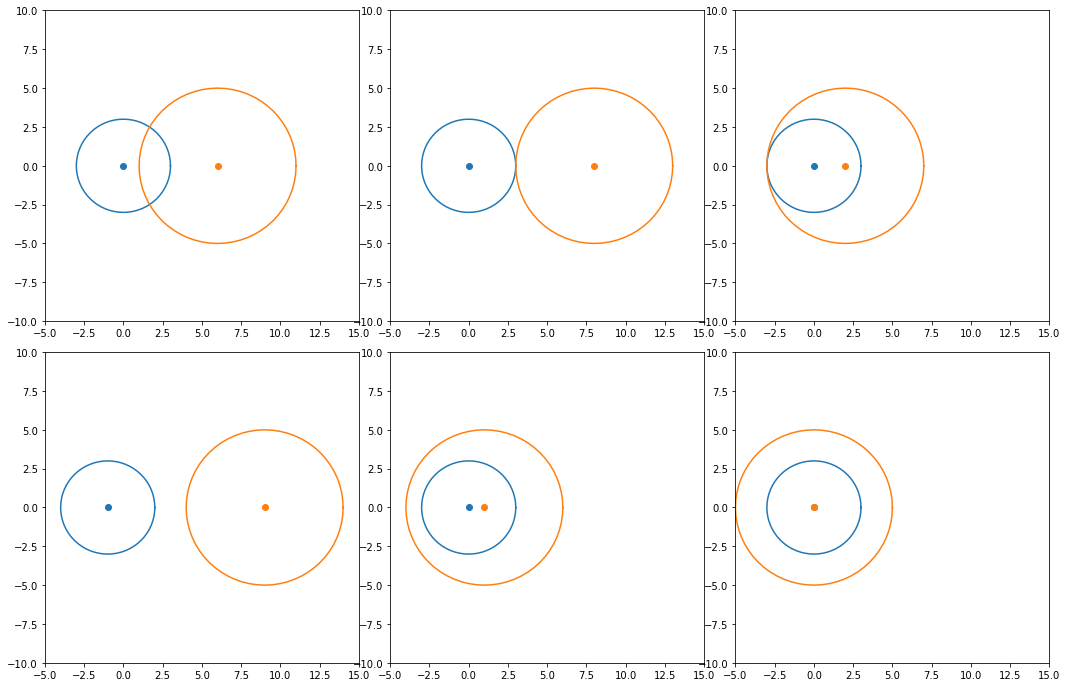

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
r1, r2 = 3, 5
cen_pts = [[[0,0], [6,0]], [[0,0], [8,0]], [[0,0], [2,0]], 
           [[-1,0], [9,0]], [[0,0], [1,0]], [[0,0], [0,0]]] 
for i in range(2):
    for j in range(3):
        p1, p2 = Point(cen_pts[(i*3)+j][0]), Point(cen_pts[(i*3)+j][1])
        c1 = p1.buffer(r1)
        c2 = p2.buffer(r2)
        ax[i][j].plot(*c1.boundary.xy)
        ax[i][j].plot(*c2.boundary.xy)
        ax[i][j].scatter(p1.x, p1.y)
        ax[i][j].scatter(p2.x, p2.y)
        ax[i][j].set_xlim(-5, 15)
        ax[i][j].set_ylim(-10, 10)
#         ax[i][j].set_xticks([])
#         ax[i][j].set_yticks([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#### 두 원의 위치관계 (r1 = 큰 원의 반지름, r2 = 작은 원의 반지름)

a. 두 점에서 만난다 <br>
* 두 원이 서로 겹치려면 작은 원의 반지름보다 가까운 거리에서 만나야 함.<br>
* 즉 두 원의 반지름을 더한 값이 중심거리보다 커야 함 r1 + r2 > d <br>
* #5 처럼 r1 + r2 > d 를 만족하지만 두 점에서 만나지 않는 경우 존재, r1 - r2 > d 추가 만족 필요<br>
* [r1 - r2 < d < r1 + r2]

b. 한 점에서 만난다 <br>
* #2(외접), #3(내접) 같이 2가지 경우 있음 <br>
* [r1 + r2 = d] or [r1 - r2 = d] <br>

c. 만나지 않는다 <br>
* #4(외부), #5(내부), #6(동심원) 같이 3가지 경우 있음
* [r1 + r2 < d] or [r1 - r2 > d] or [d = 0]

d. 접점이 무한대(두 원이 완전히 겹칠때)<br>
* [x1 == x2 and y1 == y2 and r1 == r2]

<TABLE width=750>
<TR>
    <TD rowspan='2'><center>두 점에서 만난다</center></TD>
    <TD colspan='2'><center>한 점에서 만난다</center></TD>
    <TD colspan='3'><center>만나지 않는다</center></TD>
</TR>
<TR>
    <TD>외접</TD>
    <TD>내접</TD>
    <TD>외부에 있다</TD>
    <TD>내부에 있다</TD>
    <TD>동심원</TD>
<TR>
    <TD>r1 - r2 < d < r1 + r2</TD>
    <TD>r1 + r2 = d</TD>
    <TD>r1 - r2 = d</TD>
    <TD>r1 + r2 < d</TD>
    <TD>r1 - r2 > d</TD>
    <TD>d = 0</TD>
</TR>
<TR>
    <TD>차 < d < 합</TD>
    <TD>합 = d</TD>
    <TD>차 = d</TD>
    <TD>합 < d</TD>
    <TD>차 > d</TD>
    <TD>d = 0</TD>
</TABLE>    

In [4]:
# 두 원의 관계

def relation_of_Cirs(r1, r2, d):
    if d == 0:
        return 2 # 동심원(만나지 않는다)
    else:
        if r1 - r2 < d and d < r1 + r2:
            return 0 # 두 점에서 만난다
        elif r1 + r2 == d or r1 - r2 == d:
            return 1 # 외접 or 내접 (한 점에서 만난다)
        elif r1 + r2 < d or r1 - r2 > d:
            return 2 # 외부 or 내부 (만나지 않는다)

In [66]:
# 두 원의 교차점이 두개일때 그 중 하나의 좌표를 구하는 함수
# 단 좌표 표시상의 원과의 거리만을 나타내므로 정확한 표시를 위해서는 원의 중심의 위치를 다시 고려해야 함

def calculating_location_inter(r1, r2, d):
    dx = ((r1**2) - (r2**2) + (d**2)) / (2 * d)
    dy = (r1**2 - dx**2)**0.5
    return dx, dy

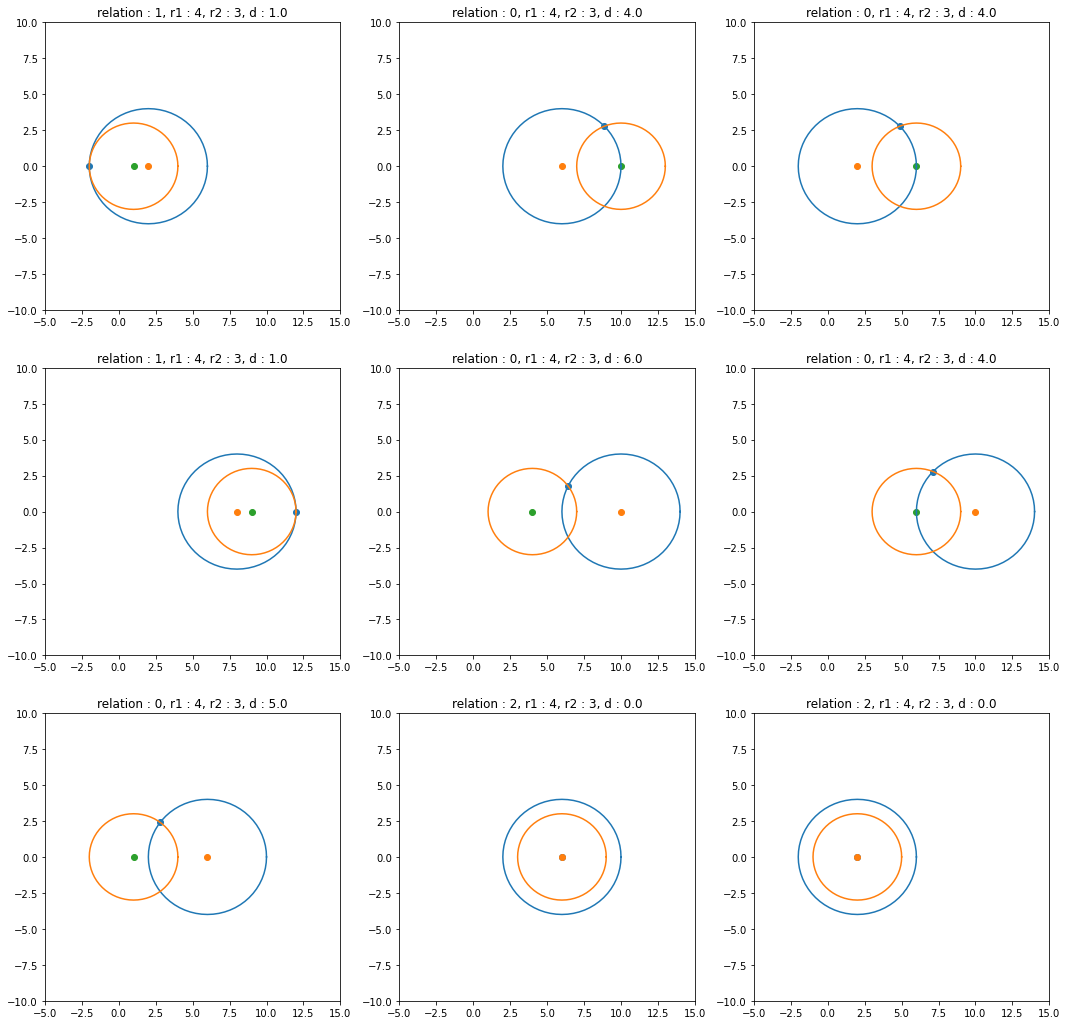

In [65]:
fig, ax = plt.subplots(3, 3, figsize=(18,18))
r1, r2 = rd.randint(3, 5), rd.randint(3, 5)
cen_pts = []
for i in range(9):
    r1x, r2x = rd.randint(0, 10), rd.randint(0, 10)
    cen_pts.append([[r1x, 0],[r2x, 0]])
for i in range(3):
    for j in range(3):
        p1, p2 = Point(cen_pts[(3*i)+j][0]), Point(cen_pts[(3*i)+j][1])
        d = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
        c1 = p1.buffer(r1)
        c2 = p2.buffer(r2)
        relation = relation_of_Cirs(max(r1, r2), min(r1, r2), d)
        # 두 원의 교차점 출력()
        # 각 원의 y == 0 일때 맞게 조정함
        # 두 원의 중점간의 기울기를 이용해 교차점의 x,y값의 조정 필요
        if relation in [0, 1] and d != 0:
            if max(r1, r2) - min(r1, r2) < d < r1 + r2 or d <= r1 + r2:
                cx, cy = calculating_location_inter(r1, r2, d)
                if p1.x < p2.x:
                    ax[i][j].scatter(cx+p1.x, cy)
                else:
                    ax[i][j].scatter(p1.x-cx, cy)
        ax[i][j].plot(*c1.boundary.xy)
        ax[i][j].plot(*c2.boundary.xy)
        ax[i][j].scatter(p1.x, p1.y)
        ax[i][j].scatter(p2.x, p2.y)
        ax[i][j].set_xlim(-5, 15)
        ax[i][j].set_ylim(-10, 10)
        ax[i][j].set_title(f'relation : {relation}, r1 : {r1}, r2 : {r2}, d : {d}')
#         ax[i][j].set_title(f'r1 CP : [{int(p1.x)}, {int(p1.y)}], r2 CP : [{int(p2.x)}, {int(p2.y)}], d = {d}, relation = {relation}')
plt.show()


In [105]:
# 두 원의 교차면적 구하기

def calculating_area_inter(x1, y1, r1, x2, y2, r2):
    d = math.sqrt((((x1 - x2)**2) + ((y1 - y2)**2)))
    # 두 원이 서로 만나지 않은 경우
    if d >= r1 + r2:
        answer = 0
    # 어떤 한 원이 다른 한 원 안에 완전히 들어가 있는 경우
    elif d <= abs(r1 - r2):
        answer = math.pi * (min(r1, r2)**2)
    # 두 원이 겹치는 경우
    else:
        x = (r1 ** 2 - r2 ** 2 + d ** 2) / (2 * d)
        y = (r1 ** 2 - x ** 2) ** 0.5
        theta1 = math.atan2(y, x) / math.pi * 180
        theta2 = math.atan2(y, d-x) / math.pi * 180
        answer = math.pi * (r1 ** 2) * theta1 / 180 + math.pi * (r2 ** 2) * theta2 / 180 - d * y
    return round(answer, 3)

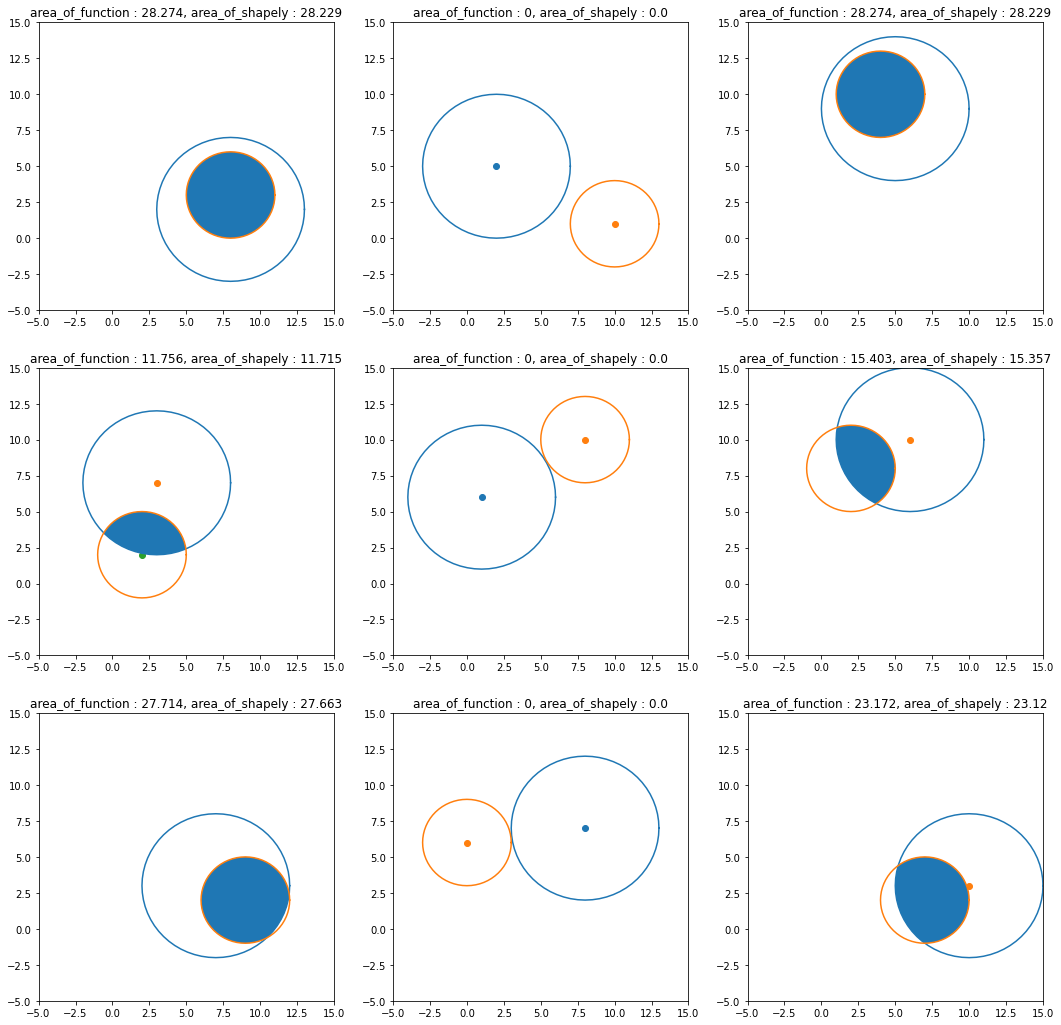

In [106]:
fig, ax = plt.subplots(3, 3, figsize=(18,18))
r1, r2 = rd.randint(3, 5), rd.randint(3, 5)
cen_pts = []
for i in range(9):
    r1x, r2x = rd.randint(0, 10), rd.randint(0, 10)
    r1y, r2y = rd.randint(0, 10), rd.randint(0, 10)
    cen_pts.append([[r1x, r1y],[r2x, r2y]])
for i in range(3):
    for j in range(3):
        p1, p2 = Point(cen_pts[(3*i)+j][0]), Point(cen_pts[(3*i)+j][1])
        d = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
        c1 = p1.buffer(r1)
        c2 = p2.buffer(r2)
        area_of_intersection_1 = calculating_area_inter(p1.x, p1.y, r1, p2.x, p2.y, r2)
        shapely_intersection = c1.intersection(c2)
        area_of_intersection_2 = round(shapely_intersection.area, 3)
        ax[i][j].plot(*c1.boundary.xy)
        ax[i][j].plot(*c2.boundary.xy)
        if shapely_intersection:
            ax[i][j].fill(*shapely_intersection.boundary.xy)
        ax[i][j].scatter(p1.x, p1.y)
        ax[i][j].scatter(p2.x, p2.y)
        ax[i][j].set_xlim(-5, 15)
        ax[i][j].set_ylim(-5, 15)
        ax[i][j].set_title(f'area_of_function : {area_of_intersection_1}, area_of_shapely : {area_of_intersection_2}')
#         ax[i][j].set_title(f'relation : {relation}, r1 : {r1}, r2 : {r2}, d : {d}')
plt.show()
